In [32]:
import pandas as pd
import json
import os
import ast
import matplotlib.pyplot as plt

In [33]:
with open("../../../data/train_test_split/test_folders.json", "r") as train_file:
    test_folders = json.load(train_file)

In [34]:
df = pd.read_csv('../../../data/base_models/llama1b/temp0.7.eval.csv')
lisa_sheets = pd.read_csv('../../../data/lisa_sheets.csv')
df = pd.merge(df, lisa_sheets[['id', 'folder']], how='left', on='id')
df = df[df['folder'].isin(test_folders)]
df.head()

,id,question,option_a,option_b,option_c,option_d,correct_option,content_gpt,originality,readability,starts_with_negation,is_question,relevance,ambiguity,gpt_answer,disclosure,difficulty,folder
0,OIC-328-06-B,What is the main difference between a stabilis...,Both aim to prevent movement in a joint,Immobilisation orthoses are designed for post-...,Stabilisation orthoses work by using a mechani...,An immobilisation orthose is typically made fr...,b,**Item_parent:** Non-drug therapies and medica...,1.0,16.710769,False,True,0.717711,0.733465,b,False,3,IC-328
1,OIC-328-12-B,What is the principle of specificity in minera...,The water must be from a specific source,The concentration of certain minerals should m...,The water's chemical composition must align wi...,The temperature and chemical composition of th...,c,**Item_parent:** Non-drug therapies and medica...,0.0,11.520000,False,True,0.632787,0.800056,a,False,2,IC-328
2,OIC-328-05-A,What is the main objective of orthotic treatment?,Downtime,Rest,Stabilization,Correction,d,**Item Parent:** Non-drug therapies and medica...,0.5,8.180000,False,True,0.708636,0.556957,c,True,3,IC-328
3,OIC-328-08-A,What does 'Aesthetic Trim' refer to in a prost...,Articulated joint,Non-articulated joint,Cable tie,Aesthetic effect only,b,**Item Parent:** Non-drug therapies and medica...,1.0,8.370000,False,True,0.745651,0.638485,d,False,5,IC-328
4,OIC-328-02-A,What is a non-medical device?,A small tool used for surgery,An instrument designed for exercise,A food additive,A laboratory supply,a,**Item Parent:** Non-drug therapies and medica...,1.0,9.960000,False,True,0.747670,0.666879,b,True,5,IC-328


In [35]:
len(df)

1524

In [36]:
df['correct_option'].unique()

array(['b', 'c', 'd', 'a',
       'To compensate for a deficient organic function', ' Disabilities',
       'option_b', 'option_a', 'to provide a replacement income',
       'To pay for sickness, maternity, disability, and death, as well as accidents at work and occupational diseases.',
       'Social Insurance', 'A slowdown in colonic transit', 'option_c',
       'To improve fertility', 'C', 'Clostridioides difficile',
       'A positive breath test for enolalic', '(a)', '}', '(B) 2%',
       'Hepatocellular carcinoma', '(1)',
       '{\r\n± The average pubertal growth peak for boys is 20-25 cm.\r\n}\r\n',
       'B', 'A',
       'A visible accumulation of fluid in the interstitial tissue', '1',
       'anatomical localization of tumour characteristics',
       'Option b: Perform a thorough clinical examination to rule out other primary cancers.',
       '(2)', 'option_d',
       'to detect hearing loss and identify treatment needs',
       '3-12 months', 'Preventative measures',
    

In [37]:
# normalize correct_option
df['correct_option'] = df['correct_option'].replace({'option_b': 'b', 'option_c': 'c', 'option_d': 'd', 'option_a': 'a'}) 

# Question mark

In [38]:
# We want to maximize 'True'
question_freqs = {
    'True': round(df['is_question'].sum()/ len(df) * 100, 2),
    'False': round((len(df) - df['is_question'].sum()) / len(df) * 100, 2)
}

question_freqs

{'True': np.float64(99.34), 'False': np.float64(0.66)}

# Negation

In [39]:
# We want to minimze 'True'
starts_with_negation_freqs = {
    'True': round(df['starts_with_negation'].sum() / len(df) * 100, 2),
    'False': round((len(df) - df['starts_with_negation'].sum()) / len(df) * 100, 2)
}

starts_with_negation_freqs

{'True': np.float64(0.0), 'False': np.float64(100.0)}

# Readability

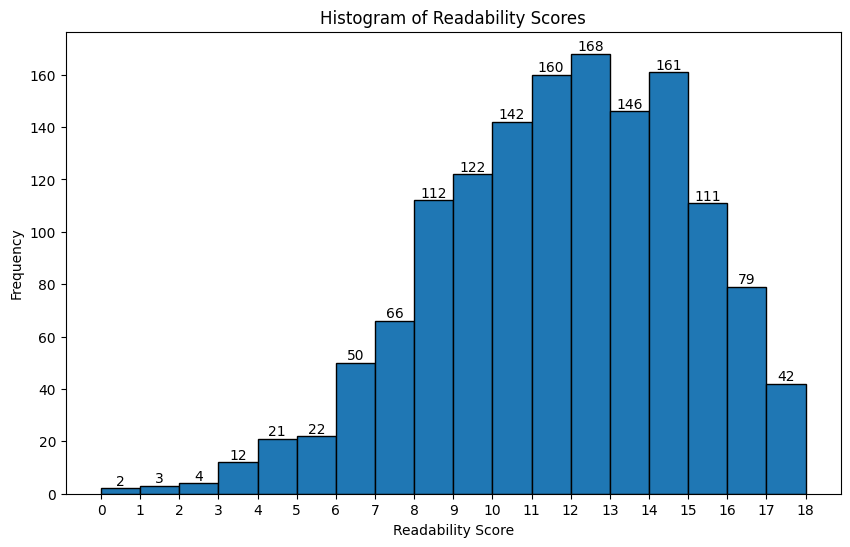

In [40]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['readability'], bins=range(0, 19, 1), edgecolor='black')

# Set x-axis ticks from 0 to 18
plt.xticks(range(0, 19))

# Add frequency labels on top of each bar where frequency > 0
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')
plt.xlabel('Readability Score')
plt.ylabel('Frequency')
plt.title('Histogram of Readability Scores')
plt.show()

In [41]:
df['readability'].describe()

count    1507.000000
mean       12.164204
std         3.662554
min        -1.840000
25%         9.655000
50%        12.286667
75%        14.480097
max        26.083333
Name: readability, dtype: float64

# Originality

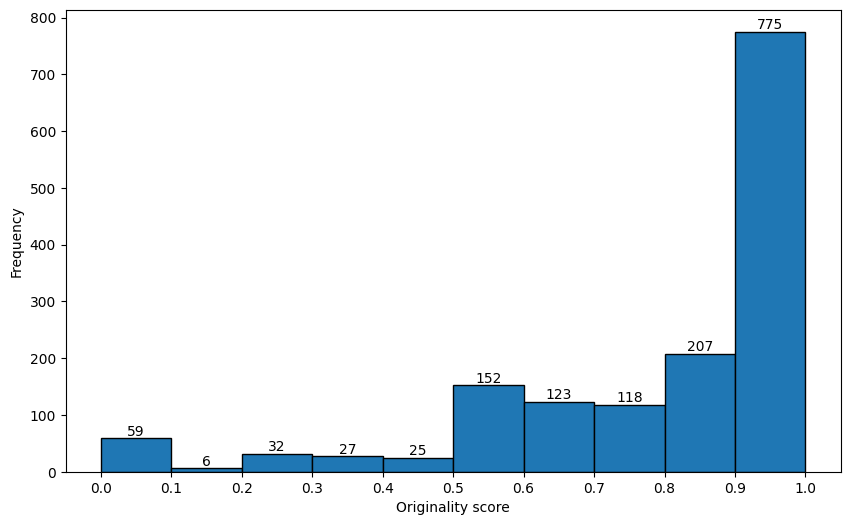

In [42]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['originality'], bins=10, range=(0, 1), edgecolor='black')

plt.xticks([round(x * 0.1, 1) for x in range(11)])

for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

plt.xlabel('Originality score')
plt.ylabel('Frequency')
plt.show()

In [43]:
df['originality'].describe()

count    1524.000000
mean        0.803856
std         0.261494
min         0.000000
25%         0.666667
50%         1.000000
75%         1.000000
max         1.000000
Name: originality, dtype: float64

# Answer Length

In [44]:
option_cols = ['option_a', 'option_b', 'option_c', 'option_d']

# Create new columns with word counts for each option column
for col in option_cols:
    df[f'{col}_word_count'] = df[col].astype(str).apply(lambda x: len(x.split()))

In [45]:
df['correct_option'].unique()

array(['b', 'c', 'd', 'a',
       'To compensate for a deficient organic function', ' Disabilities',
       'to provide a replacement income',
       'To pay for sickness, maternity, disability, and death, as well as accidents at work and occupational diseases.',
       'Social Insurance', 'A slowdown in colonic transit',
       'To improve fertility', 'C', 'Clostridioides difficile',
       'A positive breath test for enolalic', '(a)', '}', '(B) 2%',
       'Hepatocellular carcinoma', '(1)',
       '{\r\n± The average pubertal growth peak for boys is 20-25 cm.\r\n}\r\n',
       'B', 'A',
       'A visible accumulation of fluid in the interstitial tissue', '1',
       'anatomical localization of tumour characteristics',
       'Option b: Perform a thorough clinical examination to rule out other primary cancers.',
       '(2)', 'to detect hearing loss and identify treatment needs',
       '3-12 months', 'Preventative measures',
       '}  What is the average time between the eruption of

In [46]:
def get_correct_option_rank(row):
    # Get the original word counts for each option
    counts = [
        row['option_a_word_count'],
        row['option_b_word_count'],
        row['option_c_word_count'],
        row['option_d_word_count']
    ]

    # Map correct_option letter to its index (0 for A, 1 for B, etc.)
    letter_to_index = {'A': 0, 'a':0, 'B': 1, 'b':1, 'C': 2, 'c':2, 'D': 3, 'd':3}
    correct_idx = letter_to_index[row['correct_option']]

    # Determine the word count of the correct option
    correct_count = counts[correct_idx]

    # Create an effective counts list:
    # For non-correct options, if their word count equals the correct option's word count,
    # treat them as if they had one extra word.
    effective_counts = []
    for i, count in enumerate(counts):
        if i != correct_idx and count == correct_count:
            effective_counts.append(count + 1)
        else:
            effective_counts.append(count)

    # Sort the option indices by descending effective count.
    ordering = sorted(range(4), key=lambda i: effective_counts[i], reverse=True)

    # Compute the rank as the 1-indexed position of the correct option in the ordering.
    rank = ordering.index(correct_idx) + 1
    return rank

In [47]:
def get_rank_distribution(df):
  rank_distribution = df['correct_option_rank'].value_counts().sort_index()
  rank_distribution = round(rank_distribution / len(df), 2) * 100

  plt.figure(figsize=(8, 6))
  plt.bar(rank_distribution.index, rank_distribution.values, color='skyblue', edgecolor='black')
  plt.xlabel('N (1 = Longest, 4 = Shortest)')
  plt.ylabel('Frequency, %')
  plt.title('How often the correct option is N`th longest')
  plt.xticks([1, 2, 3, 4])
  plt.show()

In [48]:
# df['correct_option_rank'] = df.apply(get_correct_option_rank, axis=1)
# get_rank_distribution(df)

# Disclosure

In [49]:
disclosure_freqs = {
    'True': round((df['disclosure'].sum() / len(df)) * 100, 2),
    'False': round((len(df) - df['disclosure'].sum()) / len(df) * 100, 2)
}

disclosure_freqs

{'True': np.float64(11.35), 'False': np.float64(88.65)}

# Relevance to the input material

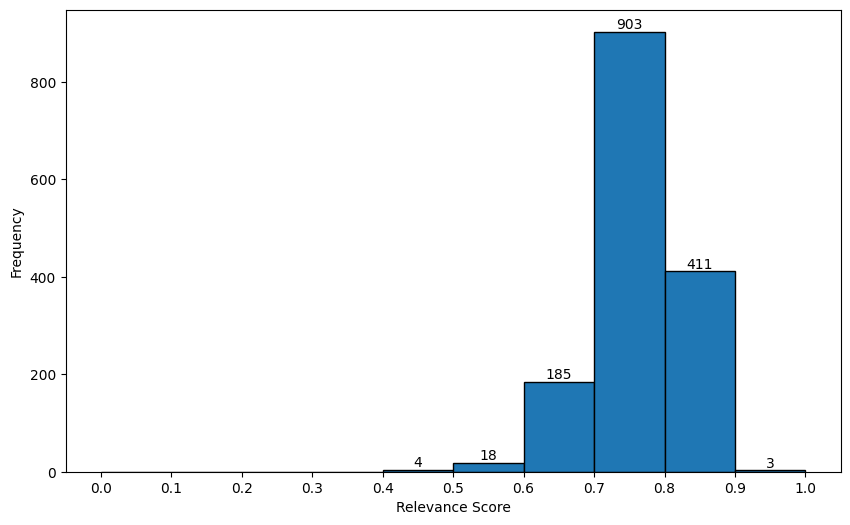

In [50]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['relevance'], bins=10, range=(0, 1), edgecolor='black')

plt.xticks([round(x * 0.1, 1) for x in range(11)])

for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.show()

In [51]:
df['relevance'].describe()

count    1524.000000
mean        0.763048
std         0.059355
min         0.459833
25%         0.729885
50%         0.767491
75%         0.803720
max         0.922309
Name: relevance, dtype: float64

# Ambiguity (cosine similarity)

Text(0.5, 1.0, 'Distribution of Ambiguity')

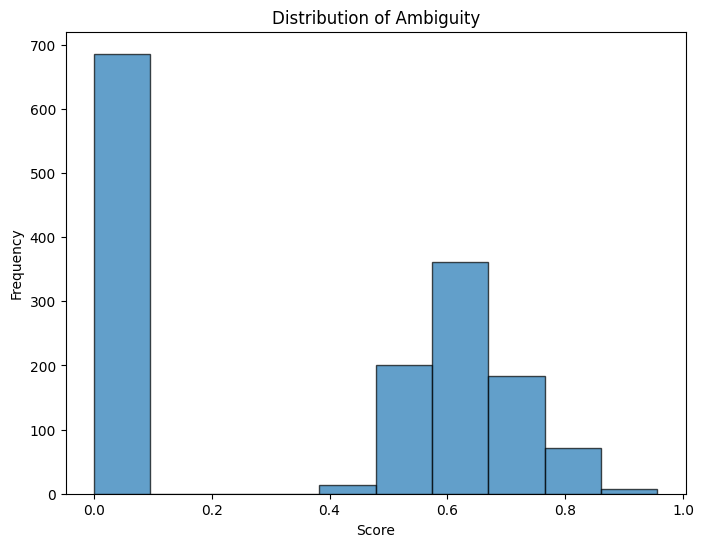

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(df['ambiguity'], bins=10, edgecolor='black', alpha=0.7)

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Ambiguity")

In [53]:
df['ambiguity'].describe()

count    1524.000000
mean        0.348893
std         0.322350
min         0.000000
25%         0.000000
50%         0.526040
75%         0.634186
max         0.956468
Name: ambiguity, dtype: float64

# Difficulty (judge LLM)

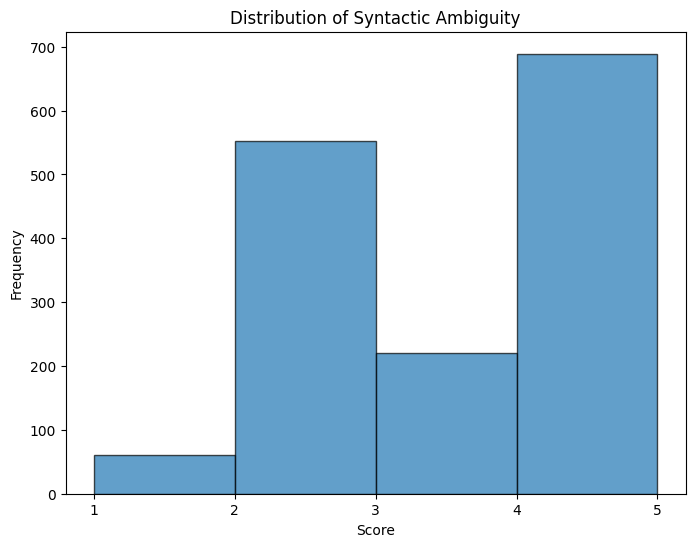

In [54]:
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist(df['difficulty'], bins=np.arange(1, 6), edgecolor='black', alpha=0.7)

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Syntactic Ambiguity")
plt.xticks(range(1, 6))

# Show the plot
plt.show()

In [55]:
df['difficulty'].describe()

count    1524.000000
mean        3.279528
std         1.307316
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: difficulty, dtype: float64

# Answerability
can judge model answer the generated question with context provided?

In [56]:
df['gpt_answer'].unique()

array(['b', 'a', 'c', 'd'], dtype=object)

In [57]:
df['correct_option'].unique()

array(['b', 'c', 'd', 'a',
       'To compensate for a deficient organic function', ' Disabilities',
       'to provide a replacement income',
       'To pay for sickness, maternity, disability, and death, as well as accidents at work and occupational diseases.',
       'Social Insurance', 'A slowdown in colonic transit',
       'To improve fertility', 'C', 'Clostridioides difficile',
       'A positive breath test for enolalic', '(a)', '}', '(B) 2%',
       'Hepatocellular carcinoma', '(1)',
       '{\r\n± The average pubertal growth peak for boys is 20-25 cm.\r\n}\r\n',
       'B', 'A',
       'A visible accumulation of fluid in the interstitial tissue', '1',
       'anatomical localization of tumour characteristics',
       'Option b: Perform a thorough clinical examination to rule out other primary cancers.',
       '(2)', 'to detect hearing loss and identify treatment needs',
       '3-12 months', 'Preventative measures',
       '}  What is the average time between the eruption of

In [58]:
answerability_freqs = {
    'True': round((df['correct_option'] == df['gpt_answer']).sum() / len(df) * 100, 2), 
    'False': round((len(df) - (df['correct_option'] == df['gpt_answer']).sum()) / len(df) * 100, 2)
}

answerability_freqs

{'True': np.float64(42.19), 'False': np.float64(57.81)}